# Decision Tree - 분류

In [10]:
import warnings
warnings.filterwarnings('ignore')


## 실습용 데이터 설정
* iris.csv

In [11]:
import seaborn as sns

DF = sns.load_dataset('iris')

* pandas DataFrame

In [12]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
DF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


# I. 탐색적 데이터 분석

> ## 1) 빈도분석

In [14]:
DF.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

> ## 2) 분포 시각화

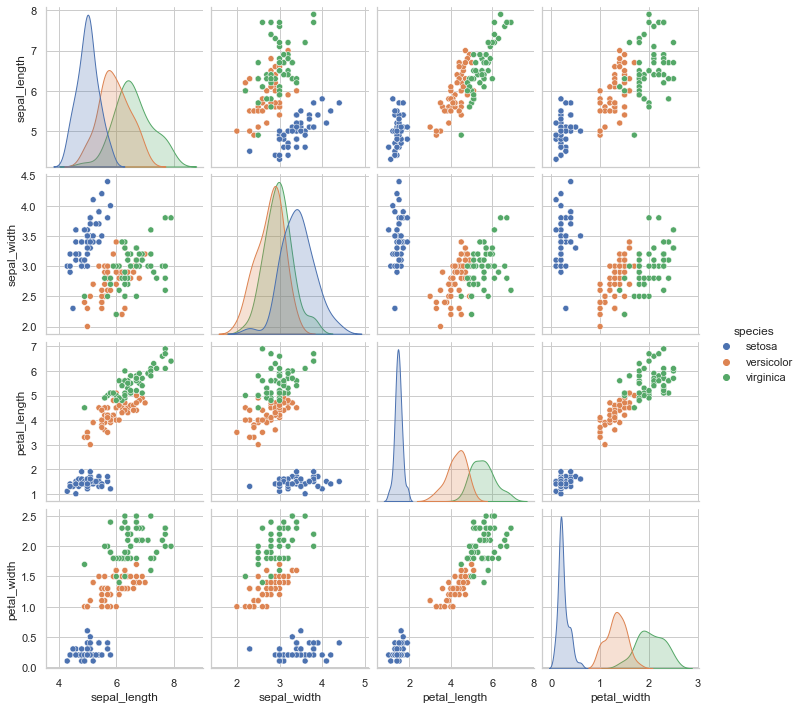

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(hue = 'species', data = DF)
plt.show()

# II. Data Preprocessing

> ## 1) Data Set

In [16]:
X = DF[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = DF['species']

> ## 2) Train & Test Split

* 7 : 3

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (105, 4) (105,)
Test Data :  (45, 4) (45,)


# III. Modeling

> ## 1) Train_Data로 모델 생성

In [18]:
from sklearn.tree import DecisionTreeClassifier

Model_dt = DecisionTreeClassifier(random_state = 2045)
Model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2045)

> ## 2) Visualization

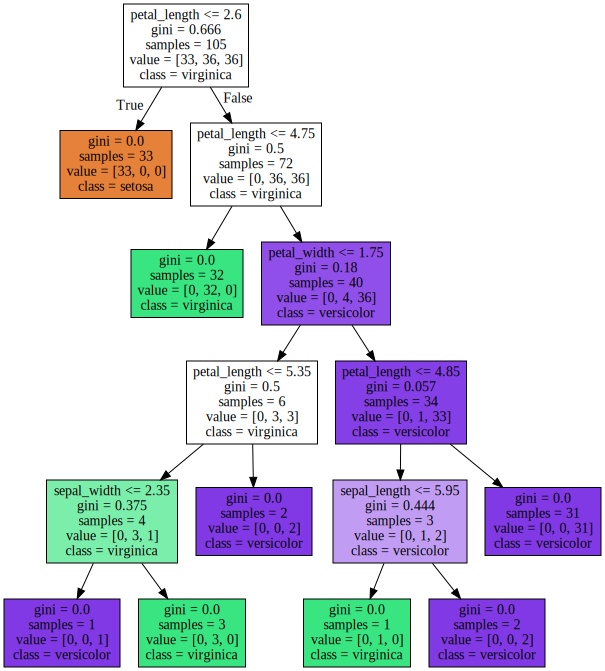

In [19]:
from sklearn.tree import export_graphviz
import graphviz

graphviz.Source(export_graphviz(Model_dt,
                                class_names = (['setosa', 'virginica', 'versicolor']),
                                feature_names = (['sepal_length', 'sepal_width', 'petal_length', 'petal_width']),
                                filled = True))

> ## 3) Test_Data에 Model 적용

In [20]:
y_hat = Model_dt.predict(X_test)

y_hat

array(['setosa', 'setosa', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'setosa', 'setosa', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica'],
      dtype=object)

> ## 4) Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat)

array([[17,  0,  0],
       [ 0, 14,  0],
       [ 0,  2, 12]], dtype=int64)

> ## 5) Accuracy, Precision, Recall

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, average = None))
print(recall_score(y_test, y_hat, average = None))

0.9555555555555556
[1.    0.875 1.   ]
[1.         1.         0.85714286]


> ## 6) F1_Score

In [23]:
from sklearn.metrics import f1_score

f1_score(y_test, y_hat, average = None)

array([1.        , 0.93333333, 0.92307692])

# IV. Pruning(가지치기)

* min_samples_split : 분할을 위한 최소한의 샘플데이터 개수
* min_samples_leaf : 말단 노드가 되기 위한 최소한의 샘플데이터 개수
* max_leaf_nodes : 말단 노드의 최대 개수
* max_depth : 트리모델의 최대 깊이를 지정

> ## 1) Model Pruning

In [24]:
from sklearn.tree import DecisionTreeClassifier

Model_pr = DecisionTreeClassifier(max_depth = 3,
                                  random_state = 2045)
Model_pr.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=2045)

> ## 2) Model Visualization

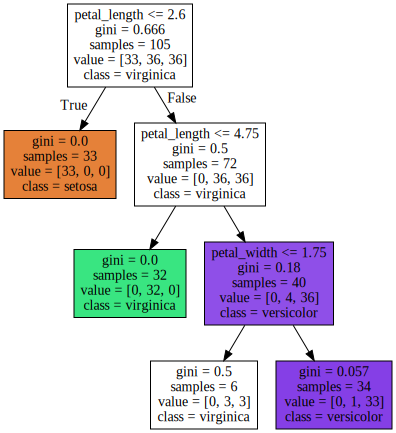

In [25]:
from sklearn.tree import export_graphviz
import graphviz

graphviz.Source(export_graphviz(Model_pr,
                                class_names = (['setosa', 'virginica', 'versicolor']),
                                feature_names = (['sepal_length', 'sepal_width', 'petal_length', 'petal_width']),
                                filled = True))

> ## 3) Model Evaluate

* Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

y_hat = Model_pr.predict(X_test)

print(confusion_matrix(y_test, y_hat))

[[17  0  0]
 [ 0 14  0]
 [ 0  2 12]]


* Accuracy, Precision, Recall

In [27]:
print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, average = None))
print(recall_score(y_test, y_hat, average = None))

0.9555555555555556
[1.    0.875 1.   ]
[1.         1.         0.85714286]


* F1-Score

In [28]:
f1_score(y_test, y_hat, average = None)

array([1.        , 0.93333333, 0.92307692])

# V. Feature Importance

> ## 1) Feature Importance 값 확인

In [29]:
# 분류하는데 영향을 미친 기여도 표시
Model_pr.feature_importances_

array([0.        , 0.        , 0.96524977, 0.03475023])

> ## 2) Feature Importance 시각화

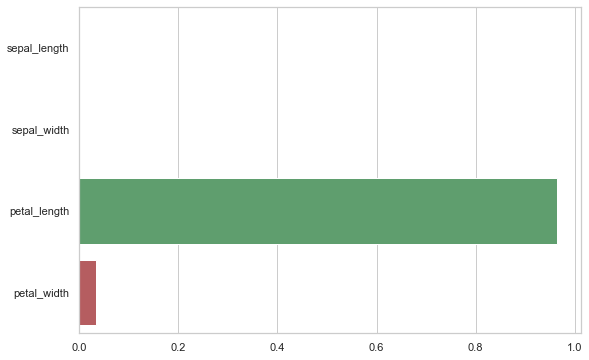

In [30]:
plt.figure(figsize = (9, 6))
sns.barplot(Model_pr.feature_importances_,
            ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.show()

In [32]:
Model_dt.feature_importances_

array([0.01906318, 0.02144608, 0.92719547, 0.03229527])

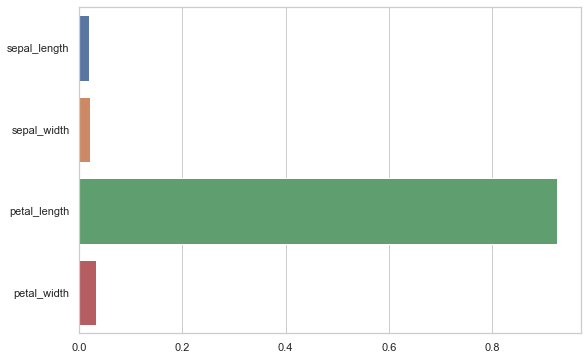

In [35]:
plt.figure(figsize = (9, 6))
sns.barplot(Model_dt.feature_importances_,
            ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.show()

# 
# 
# 
# The End
# 
# 
# 